Total train image is : 1000 


IndexError: index 2303 is out of bounds for axis 0 with size 1536

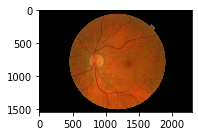

In [3]:
from os.path import join, exists
import cv2
import csv
from torchvision import datasets, transforms
from data.base_fundus import Preproc, Rescale, RandomCrop, ToTensor, Normalization, Resize
import matplotlib.pyplot as plt

class FundusList():
    def __init__(self, data_dir, phase, transforms, list_dir=None):
        self.list_dir = data_dir if list_dir is None else list_dir
        self.data_dir = data_dir
        self.phase = phase
        self.transforms = transforms
        self.image_list = None
        self.label_list = None
        self.bbox_list = None
        self.read_lists()   # 读取数据集

    def getitem(self, index):
        data = cv2.imread(join(self.data_dir, self.phase, self.image_list[index]))
        plt.subplot(121)
        plt.imshow(data[:,:,::-1])
        data = self.transforms(data)
        plt.subplot(122)
        plt.imshow(data[:,:,::-1])
        return tuple([data, self.label_list[index]])

    def __len__(self):
        return len(self.image_list)

    def read_lists(self):
        label_path = join(self.list_dir, self.phase + '_label.csv')
        assert exists(label_path)

        with open(label_path, 'r') as f:
            reader = csv.reader(f)
            data = list(reader)
            data = data[1:]
            self.image_list = list()
            self.label_list = list()
            for line in data:
                self.image_list.append(line[0])
                self.label_list.append(int(line[2]))
        assert len(self.image_list) == len(self.label_list)

        if self.phase == 'train':
            print('Total train image is : %d ' % len(self.image_list))
        elif self.phase == 'val':
            print('Total val pid is : %d ' % len(self.image_list))
        else:
            print('Total test pid is : %d ' % len(self.image_list))

            
data_dir = '/home/hejiawen/datasets/Messidor/image/'
list_dir = '/home/hejiawen/datasets/Messidor/label/'

data_transforms = transforms.Compose([
        Preproc(0.2),   # 裁剪
        Rescale((336, 224)),   # 调整大小
        # RandomCrop(224),
        transforms.CenterCrop(224),     # 以中心裁剪
        # transforms.RandomRotation((-30, 30)),
        # Resize(224),
#         ToTensor(),
        # ColorJitter(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_dataset = FundusList(data_dir, 'train', data_transforms, list_dir=list_dir)

train_dataset.getitem(985)